In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

!python3 --version
print(f"Library versions:")
print(f"  -      numpy: {np.__version__}")
print(f"  - matplotlib: {mpl.__version__}")

Python 3.12.8
Library versions:
  -      numpy: 2.2.2
  - matplotlib: 3.10.0


In [2]:
# Part 1.1
def h_ext(theta0, theta, c, epsilon):
    return c*((1-epsilon)+epsilon*np.cos(2*(theta - theta0)))

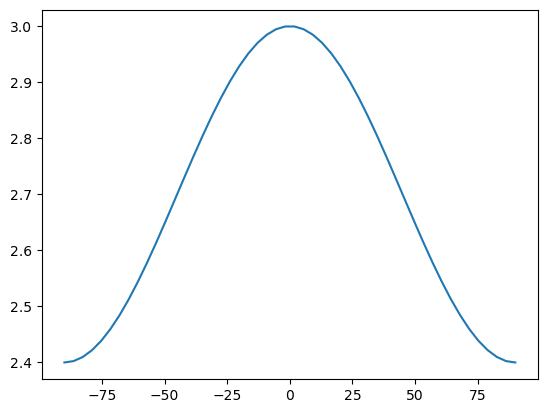

In [3]:
def part_1_2():
    N = 50
    theta = np.linspace(-np.pi/2, np.pi/2, N)
    plt.plot(np.degrees(theta), h_ext(0, theta, 3, 0.1))
    plt.show()
    
part_1_2()

In [4]:
# Part 1.3
def g(h, T, beta):
    c2 = (T<h) & (h <= T+1/beta)
    c3 = h > T+1/beta
    return c2 * beta*(h-T) + c3

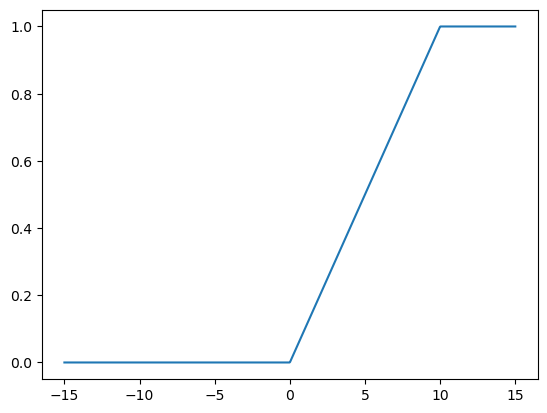

In [5]:
def part_1_4():
    h = np.linspace(-15,15,1000)
    plt.plot(h, g(h, 0, 0.1))
    plt.show()
    
part_1_4()

### Plotting boilerplate

In [6]:
def plot_m_images(ts, m, theta, cmap="OrRd"):
    vmin, vmax = np.min(m), np.max(m)
    dtheta = np.degrees(theta)
    yticks = np.linspace(dtheta[0], dtheta[-1], num=5)
    if len(m.shape) == 2: m = [m]

    fig, axs = plt.subplots(len(m),1, figsize=(3*len(m),6), sharex=True, sharey=True)

    if len(m) == 1: axs = [axs]
    for ax, mi in zip(axs, m):
        im = ax.imshow(mi.T[::-1], aspect='auto', cmap=cmap, extent=[ts[0], ts[-1], dtheta[0], dtheta[-1]], vmin=vmin, vmax=vmax)
        ax.set_yticks(yticks)
    cbar = fig.colorbar(im, ax=axs, orientation='vertical', label="Firing rate")
    fig.supylabel(r"Orientation (deg $^\circ$)")
    fig.supxlabel(r"Time (ms)")
    plt.show()

def plot_m_lines(ts, m, theta, cmap="managua"):
    vmin, vmax = np.min(m), np.max(m)
    pad = 0.05 * (vmax - vmin)
    N = m.shape[-1]
    dtheta = np.degrees(theta)
    dticks = np.linspace(dtheta[0], dtheta[-1], num=5)
    if len(m.shape) == 2: m = [m]

    fig = plt.figure(figsize=(3*len(m),2))
    gs = mpl.gridspec.GridSpec(1, len(m) + 1, width_ratios=[1] * len(m) + [.1], wspace=0.3)
    axs = [fig.add_subplot(gs[0, i]) for i in range(len(m))]
    cbar_ax = fig.add_subplot(gs[0, len(m)])

    for ax, mi in zip(axs, m):
        ax.set_prop_cycle(color=plt.get_cmap(cmap)(np.linspace(0,1,N)))
        ax.plot(ts, mi)
        ax.set_ylim([vmin-pad, vmax+pad])

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=dtheta.min(), vmax=dtheta.max()))
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax, label=r"Orientation (deg $^\circ$)")
    cbar.set_ticks(dticks)
    fig.supylabel("Firing rate")    
    plt.show()


def plot_m_line_image(ts, m, theta, line_cmap="managua", image_cmap="OrRd", title=None):
    N = m.shape[-1]
    dtheta = np.degrees(theta)
    dticks = np.linspace(dtheta[0], dtheta[-1], num=5)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    cmap = plt.get_cmap(line_cmap)
    ax1.set_prop_cycle(color=cmap(np.linspace(0, 1, N)))
    ax1.plot(ts, m)
    ax1.set_ylabel(r"Firing rate")
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=dtheta.min(), vmax=dtheta.max()))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax1, fraction=0.05, pad=0.02, label=r"Orientation (deg $^\circ$)")
    cbar.set_ticks(dticks)
    
    im = ax2.imshow(m.T[::-1], aspect='auto', cmap=image_cmap, extent=[ts[0], ts[-1], dtheta[0], dtheta[-1]])
    ax2.set_yticks(dticks)
    ax2.set_ylabel(r"Orientation (deg $^\circ$)")
    fig.colorbar(im, ax=ax2, fraction=0.05, pad=0.02, label="Firing rate")

    fig.supxlabel("Time (ms)")
    if title: fig.suptitle(title)

    plt.show()

### Part 2

In [7]:
# Part 2.1
def euler_sim_1(m0, theta, theta0, Ni, c, epsilon, dt=1, tau=5, T=0, beta=0.1, stim=True):
    m = np.zeros((Ni, len(m0)))
    m[0] = m0
    for t in range(Ni-1):
        m[t+1] = m[t] + dt/tau *(-m[t] + g(stim * h_ext(theta0, theta, c, epsilon), T, beta))
    return np.arange(Ni)*dt, m

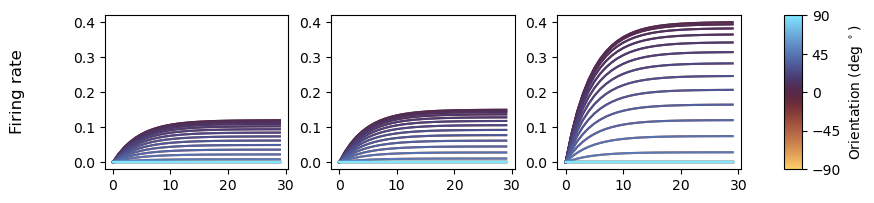

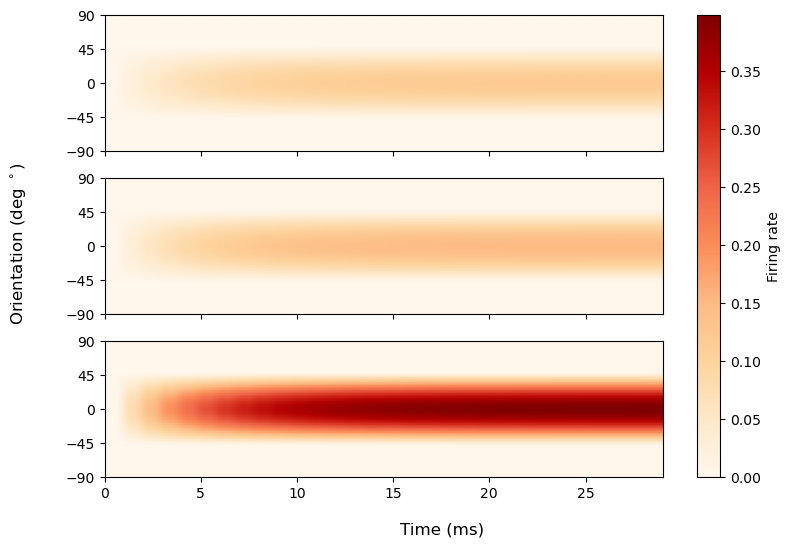

In [8]:
def part_2_23():
    N = 50
    theta = np.linspace(-np.pi/2, np.pi/2, N)
    m0 = np.zeros_like(theta)

    m = [None] * 3
    for i, c in enumerate([1.2,1.5,4]):
        ts, m[i] = euler_sim_1(m0, theta, 0, 30, c, 0.9)
    m = np.array(m)
    
    plot_m_lines(ts, m, theta)
    plot_m_images(ts, m, theta)
    
part_2_23()

### Part 3

In [9]:
def j(thetai, j0=86, j2=112):
    thetai = thetai[:,None]
    thetaj = thetai.T
    return -j0 + j2 * np.cos(2*(thetai - thetaj))

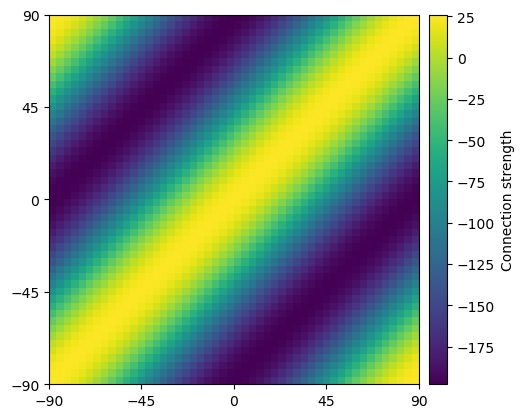

In [10]:
def part_3_1():
    N = 50
    theta = np.linspace(-np.pi/2, np.pi/2, 50)
    dtheta = np.degrees(theta)
    
    plt.imshow(j(theta), aspect='equal', extent=[dtheta[0], dtheta[-1], dtheta[-1], dtheta[0]], cmap='viridis')
    plt.colorbar(fraction=0.05, pad=0.02, label="Connection strength")
    ticks = np.linspace(dtheta[0], dtheta[-1], 5)
    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.gca().invert_yaxis()
    plt.show()

part_3_1()

In [11]:
def euler_sim_2(m0, theta, theta0, Ni, c, epsilon, dt=1, tau=5, T=0, beta=0.1, stim=True):
    J = j(theta)
    m = np.zeros((Ni, len(m0)))
    m[0] = m0
    for t in range(Ni-1):
        m[t+1] = m[t] + dt/tau *(-m[t] + g(J @ m[t] + stim * h_ext(theta0, theta, c, epsilon), T, beta))
    return np.arange(Ni)*dt, m

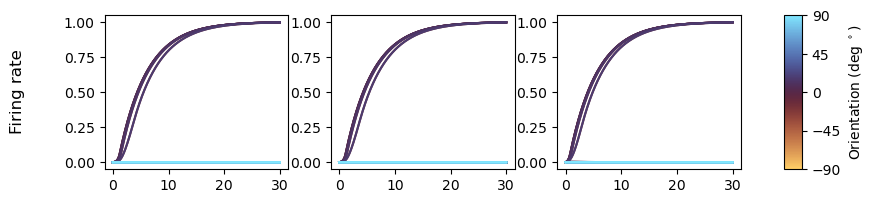

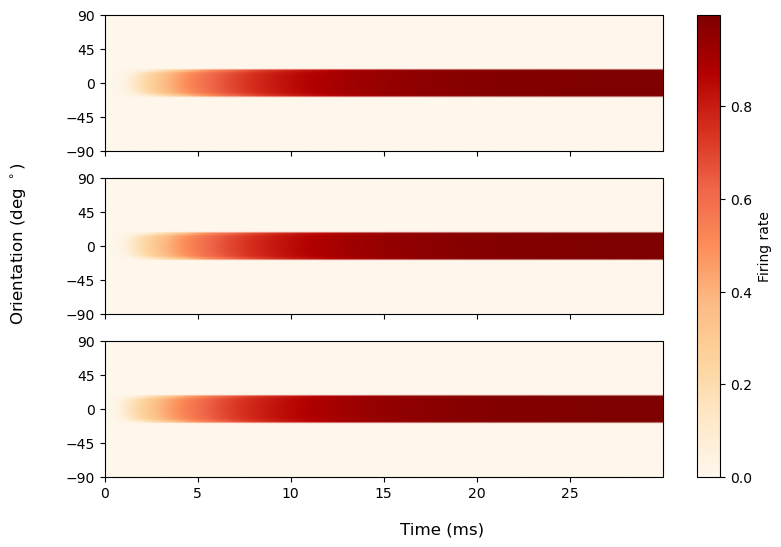

In [12]:
def part_3_2():
    N = 50
    theta = np.linspace(-np.pi/2, np.pi/2, N)
    m0 = np.zeros_like(theta)

    m = [None] * 3
    for i, c in enumerate([1.2,1.5,4]):
        ts, m[i] = euler_sim_2(m0, theta, 0, 3000, c, 0.1, dt=0.01)
    m = np.array(m)
    vmin, vmax = np.min(m), np.max(m)
    pad = 0.05 * (vmax - vmin)

    plot_m_lines(ts, m, theta)
    plot_m_images(ts, m, theta)

part_3_2()

**Why the delay in 3.2?**
    Network is going to its fixed point, at first it takes a while to find get close, after that it quickly converges.
**Why does it change if I increase resolution?**
    This is just because the approximation is getting better
    We can imagine the phase landscape is very rough, stepping big
    steps makes it oscillate more around the FP, with better 
    resolution we just converge faster.


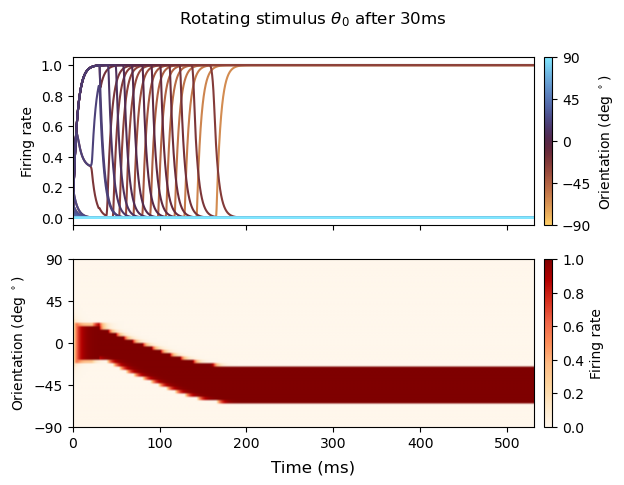

In [13]:
def part_4_1():
    N = 50
    theta = np.linspace(-np.pi/2, np.pi/2, N)
    m0 = np.zeros_like(theta)
    t1, m1 = euler_sim_2(m0, theta, 0, 3000, 100, 0.8, dt=0.01)
    t2, m2 = euler_sim_2(m1[-1], theta, 2*np.pi/3, 50000, 100, 0.8, dt=0.01)
    m = np.append(m1, m2, axis=0)
    ts = np.append(t1, t2 + t1[-1]+1, axis=0)

    plot_m_line_image(ts, m, theta, title=r"Rotating stimulus $\theta_0$ after 30ms")

part_4_1()

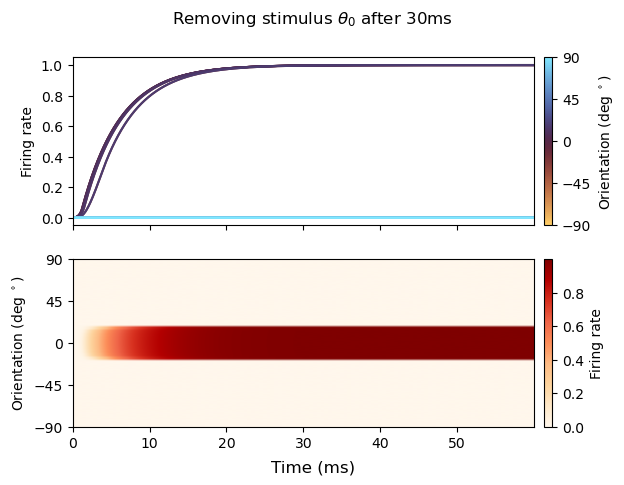

In [14]:
def part_4_2():
    N = 50
    theta = np.linspace(-np.pi/2, np.pi/2, N)
    m0 = np.zeros_like(theta)
    t1, m1 = euler_sim_2(m0, theta, 0, 3000, 1.2, 0.1, dt=0.01)
    t2, m2 = euler_sim_2(m1[-1], theta, 0, 3000, 1.2, 0.1, stim=False, dt=0.01)
    m = np.append(m1, m2, axis=0)
    ts = np.append(t1, t2 + t1[-1], axis=0)

    plot_m_line_image(ts, m, theta, title=r"Removing stimulus $\theta_0$ after 30ms")

part_4_2()

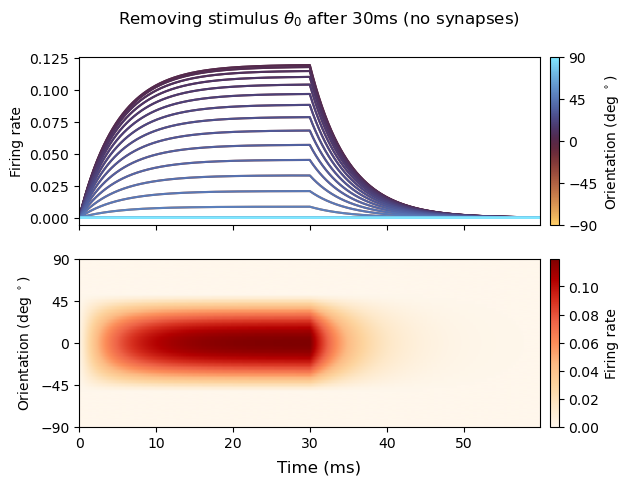

In [15]:
def part_4_3():
    N = 50
    theta = np.linspace(-np.pi/2, np.pi/2, N)
    m0 = np.zeros_like(theta)
    t1, m1 = euler_sim_1(m0, theta, 0, 3000, 1.2, 0.8, dt=0.01)
    t2, m2 = euler_sim_1(m1[-1], theta, 0, 3000, 1.2, 0.8, stim=False, dt=0.01)
    m = np.append(m1, m2, axis=0)
    ts = np.append(t1, t2 + t1[-1], axis=0)

    plot_m_line_image(ts, m, theta, title=r"Removing stimulus $\theta_0$ after 30ms (no synapses)")

part_4_3()